#### Problem Statement :
    
Using an artificial neural network to predict customers who leave the bank.

#### What is Churn and Why Does it Matter?

Churn is defined slightly differently by each organization or product. 

Generally, the customers who stop using a product or service for a given period of time are referred to as churners. 

As a result, churn is one of the most important elements in the Key Performance Indicator (KPI) of a product or service.

A full customer lifecycle analysis requires taking a look at retention rates in order to better understand the health of the business or product. 

From a machine learning perspective, churn can be formulated as a binary classification problem. Although there are other approaches to churn prediction (for example, survival analysis), the most common solution is to label “churners” over a specific period of time as one class and users who stay engaged with the product as the complementary class.  

The way many data analysts try to model this problem is by thinking in black-and-white terms: churn vs no-churn. It’s really easy to view the problem in this way as it’s a pattern we all know — supervised classification.

#### Data Attributes and Labels 

The initial ingredient for building any predictive pipeline is data. For churn specifically, historical data is captured and stored in a data warehouse, depending on the application domain. The process of churn definition and establishing data hooks to capture relevant events is highly iterative. It is very important to keep this in mind as the initial churn definition, with its associated data hooks, may not be applicable or relevant anymore as a product or a service matures. That’s why it’s essential for data scientists to not only monitor the performance of the predictive pipeline over time but also to pay close attention to the alignment of churn definition with the product’s changes as they might affect who the churners are.

The specific attributes used in a churn model are highly domain dependent. However, broadly speaking, the most common attributes capture user behavior with regards to engagement level with a product or service. This can be thought of as the number of times that a user logs into her/his account in a week or the amount of time that a user spends on a portal. In short, frequency and intensity of usage/engagement are among the strongest signals to predict churn.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


#### Dataset Details 

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [9]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here Features or predictor varaibales are columns 3 to 13, i.e columns RowNumber, CutomerId , Surname are of no importance in predicting whether a customer will stay or leave the bank.

Labels in the dataset is the Exited column

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# OnehotEncoding categorical data to numeric data
# because ANN's can only work with numeric Geography and Gender columns contain categorical data
dummies = pd.get_dummies(dataset[['Geography','Gender']])
dummies.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [11]:
dataset_new  = dataset.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1)
dataset_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data = dummies.join(dataset_new)
data.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.shape

(10000, 14)

In [20]:
#predictor variables from 3rd to 12th collumn
X = dataset_new.drop('Exited',axis=1).values
#Labels Exited people (1 or 0)
y = dataset_new['Exited'].values 

In [21]:
X

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [22]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [24]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8000, 8) (2000, 8)
(8000,) (2000,)


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


One of the key purposes of churn prediction is to find out what factors increase churn risk.

Tree-based machine learning models, make it easy to visualize feature importance.

In [29]:
!pip install graphviz

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import scikitplot

In [55]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_proba = model.predict_proba(X_test)
y_pred  =  model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.20%


C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


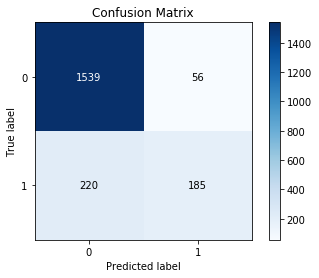

In [56]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred)

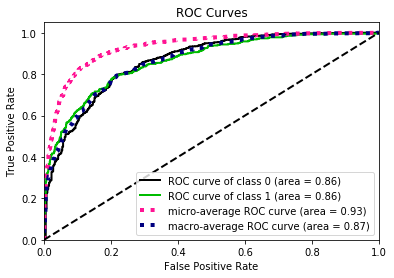

In [57]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

In [58]:
y_pred_proba

array([[0.87781084, 0.12218918],
       [0.75335354, 0.24664646],
       [0.8045732 , 0.19542684],
       ...,
       [0.9232984 , 0.0767016 ],
       [0.9004769 , 0.09952313],
       [0.83807135, 0.16192865]], dtype=float32)

Accuracy: 80.35%


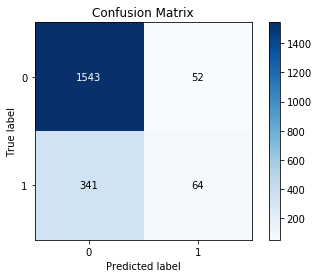

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred)

#### Using Feed Forward Aritificial Neural Network

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initialising the ANN
classifier = Sequential()

# Add input layer and hidden layer no.1
# 6 output nodes, Relu activation function and 11 input nodes
# Output nodes is determined by the number of input nodes+1/2 (6)
# the uniform method makes sure the weights are given randomly with small numbers close to 0
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 8))

# Add the second hidden layer to achieve a deep neural network
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Add the Output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

classifier.summary()
#Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 


classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\INTEL\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=6, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
8000/8000 [==============================] - 3s 415us/step - loss: 0.4948 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4373 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4304 - acc: 0.8115
Epoch 4/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4233 - acc: 0.8264
Epoch 5/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4181 - acc: 0.8315
Epoch 6/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4167 - acc: 0.829 - 1s 142us/step - loss: 0.4155 - acc: 0.8304
Epoch 7/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4134 - acc: 0.8312
Epoch 8/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4117 - acc: 0.8317
Epoch 9/100
8000/8000 [==============================] - 1s 141us/step - loss: 0.4100 - acc: 0.8311
Epoch 10/100
8000/8000 [==============================] - 1s 1

8000/8000 [==============================] - 1s 134us/step - loss: 0.3492 - acc: 0.8550
Epoch 82/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.3495 - acc: 0.8540
Epoch 83/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.3495 - acc: 0.8539
Epoch 84/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.3495 - acc: 0.8541
Epoch 85/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.3493 - acc: 0.8554
Epoch 86/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.3497 - acc: 0.8546
Epoch 87/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.3492 - acc: 0.8532
Epoch 88/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.3497 - acc: 0.8535
Epoch 89/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.3495 - acc: 0.8556
Epoch 90/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.3494 - acc: 0.8554
Epo

In [59]:

# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test)

# Create a treshold to predict a true or false for leaving the
# the bank.
y_pred = (y_pred_proba > 0.5)

Accuracy: 86.35%


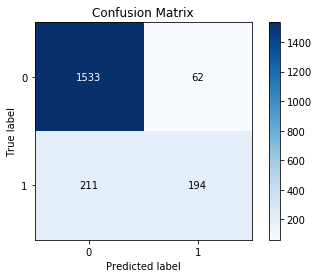

In [60]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred)

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)


ROC AUC  0.7200704361623902


In [53]:
len(y_pred_proba),len(y_test)

(2000, 2000)

In [68]:
pred_proba = []
for items in y_pred_proba:
    list1 =[]
    list1.append(1 -items)
    list1.append(items)
    pred_proba.append([1 - items,items])

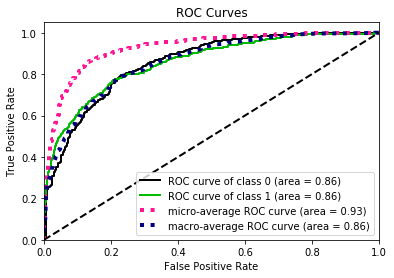

In [70]:
scikitplot.metrics.plot_roc(y_test,pred_proba)

In [71]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

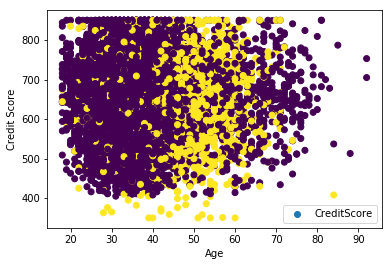

In [74]:
from matplotlib import pyplot as plt 
plt.scatter(data['Age'],data['CreditScore'], c=data['Exited']) 
plt.ylabel('Credit Score') 
plt.xlabel('Age')
plt.legend()

#### Survival Analysis

What Logistic Regression is doing (under the hood) is assigning a probability to each observation that describes how likely it is to belong to the positive class.

In the case of churn vs no-churn, and any kind of classification, this can seem like a minor annoyance that we have to overcome by selecting a cutoff and rounding the output (<0.5 means 0, >=0.5 means 1). However, if you think about it, this probability is exactly what we want.

In any large enough group of customers there are going to be people who have the same attributes / features (that’s the pigeon hole principle at work). Some of those will churn and some of them won’t, and what you’d ideally like to know is the probability of churn for each group. This is what Logistic Regression gives you (before you cutoff and round), but using Logistic Regression in this scenario does have one problem — it’s not clear what time scale it’s predicting for. Enter Survival Analysis.

Survival Analysis is a set of methods used in the life sciences (mostly Epidemiology and Pharma research) to determine the probability of patient cohort survival over time. It’s a very large body of work with a great many intricate and statistically sophisticated tools, but we’ll only be using one of them — The Cox Proportional Hazards Model.

#### The Cox Proportional Hazards Model

The Cox PH Model is a regression based model that analyses the covariates (features) of a dataset with regards to how long a patient (or customer) survives. It is called the Proportional Hazards model as it describes how each feature proportionally increases risk over the baseline survival rate for a cohort.

Thanks to the very good and well-documented lifelines package in Python, it is simple to get started using the Cox PH model.